In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Hyperparameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
batch_size = 64
learning_rate = 0.01
epochs = 20

In [ ]:
# MNIST dataset with torchvision
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize mean/std of MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.00MB/s]


In [ ]:
# Define Feedforward Neural Network
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten images
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
# Initialize model, loss, optimizer
model = FeedForwardNN(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
train_accuracies = []

print("Training...")
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc*100:.2f}%")

Training...
Epoch [1/20], Loss: 0.5796, Accuracy: 85.40%
Epoch [2/20], Loss: 0.2990, Accuracy: 91.47%
Epoch [3/20], Loss: 0.2524, Accuracy: 92.77%
Epoch [4/20], Loss: 0.2210, Accuracy: 93.76%
Epoch [5/20], Loss: 0.1971, Accuracy: 94.47%
Epoch [6/20], Loss: 0.1776, Accuracy: 95.04%
Epoch [7/20], Loss: 0.1619, Accuracy: 95.44%
Epoch [8/20], Loss: 0.1486, Accuracy: 95.83%
Epoch [9/20], Loss: 0.1374, Accuracy: 96.14%
Epoch [10/20], Loss: 0.1277, Accuracy: 96.42%
Epoch [11/20], Loss: 0.1191, Accuracy: 96.68%
Epoch [12/20], Loss: 0.1119, Accuracy: 96.86%
Epoch [13/20], Loss: 0.1054, Accuracy: 97.06%
Epoch [14/20], Loss: 0.0994, Accuracy: 97.26%
Epoch [15/20], Loss: 0.0941, Accuracy: 97.40%
Epoch [16/20], Loss: 0.0892, Accuracy: 97.52%
Epoch [17/20], Loss: 0.0849, Accuracy: 97.67%
Epoch [18/20], Loss: 0.0810, Accuracy: 97.78%
Epoch [19/20], Loss: 0.0772, Accuracy: 97.87%
Epoch [20/20], Loss: 0.0737, Accuracy: 97.99%


In [ ]:
# Evaluation on test data
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

test_accuracy = np.mean(all_preds == all_labels)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Test Accuracy: 97.24%
Precision: 0.9724
Recall:    0.9724
F1 Score:  0.9724


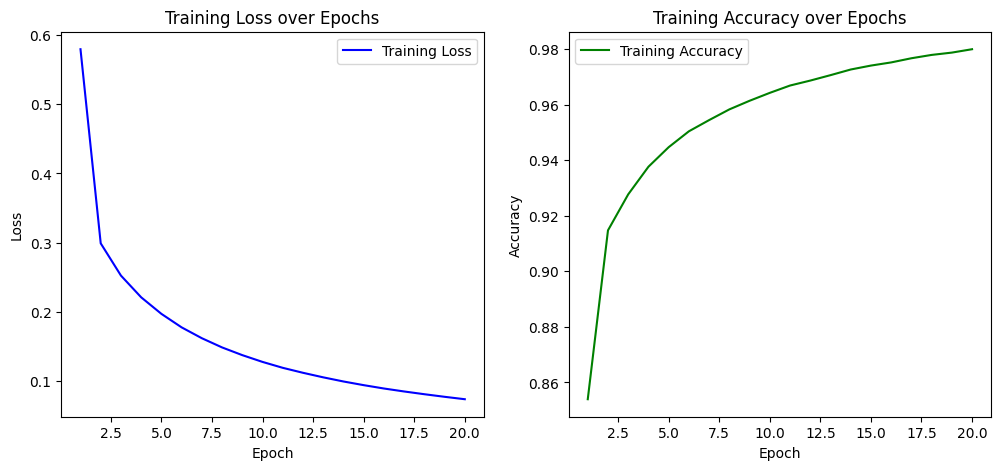

In [ ]:
# Plot training loss and accuracy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.show()